<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
data.shape

(5282, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [6]:
data = data.dropna(how='any')

In [7]:
any(data.isna())

True

In [8]:
data.tail()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0
5281,19,75.90,1375.6,Female,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [10]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [11]:
for col in feature_cols:
    print(f'{col}: {sum(data.isna()[col].astype(int))}')


ClientPeriod: 0
MonthlySpending: 0
TotalSpent: 0
Sex: 0
IsSeniorCitizen: 0
HasPartner: 0
HasChild: 0
HasPhoneService: 0
HasMultiplePhoneNumbers: 0
HasInternetService: 0
HasOnlineSecurityService: 0
HasOnlineBackup: 0
HasDeviceProtection: 0
HasTechSupportAccess: 0
HasOnlineTV: 0
HasMovieSubscription: 0
HasContractPhone: 0
IsBillingPaperless: 0
PaymentMethod: 0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [12]:
sum((data['TotalSpent'] == ' ').astype(int))

9

In [13]:
data[data['TotalSpent'] == ' '].index

Int64Index([1048, 1707, 2543, 3078, 3697, 4002, 4326, 4551, 4598], dtype='int64')

In [14]:
data = data.drop(data[data['TotalSpent'] == ' '].index)

In [15]:
data.shape

(5273, 20)

In [16]:
data['TotalSpent'] = data['TotalSpent'].astype(float);
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].astype(bool).astype(str);
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   object 
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

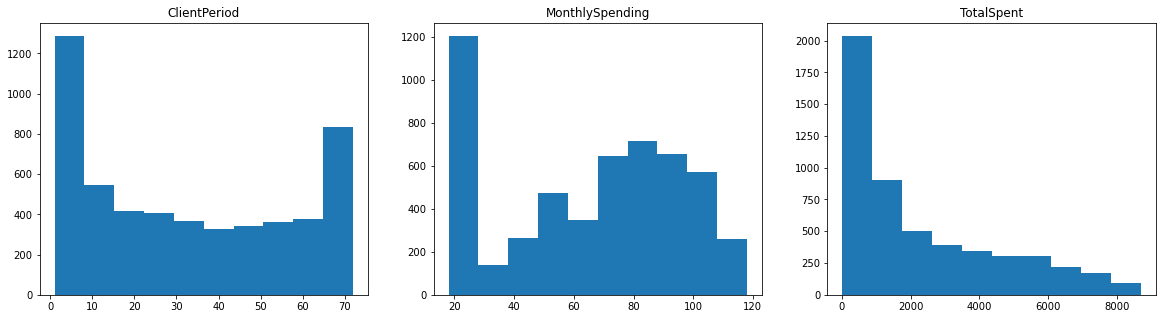

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for i, col in enumerate(num_cols):
    ax[i].set_title(col)
    ax[i].hist(data[col].astype(int))

А теперь категориКАЛ

In [18]:
len(cat_cols)

16

In [19]:
data['Sex'].value_counts()

Male      2651
Female    2622
Name: Sex, dtype: int64

In [20]:
data['Sex'].unique()

array(['Male', 'Female'], dtype=object)

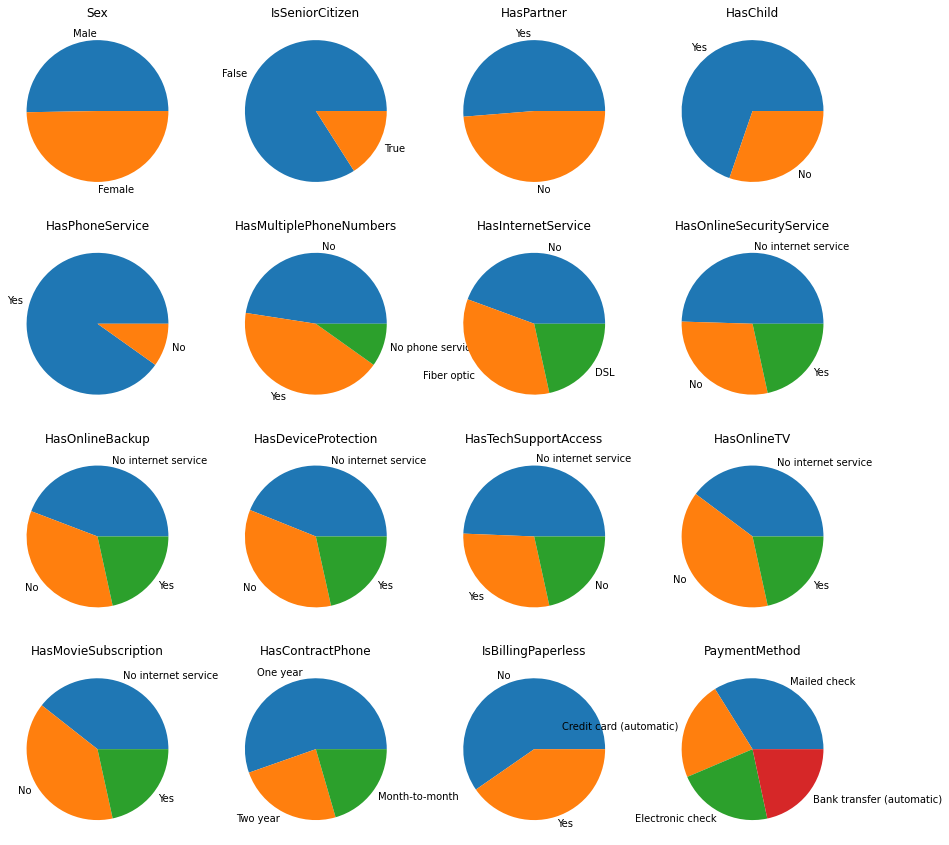

In [21]:
fig, ax = plt.subplots(4, 4, figsize=(15, 15))
for i, col in enumerate(cat_cols):
    ax[i // 4][i % 4].set_title(col)
    ax[i // 4][i % 4].pie(data[col].value_counts(), labels=data[col].unique())

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [22]:
# YOUR CODE

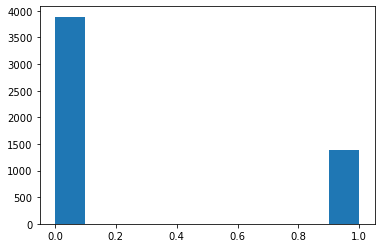

In [23]:
plt.hist(data[target_col]);

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [24]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [25]:
numerical_data = data[num_cols]

categorical_data = data[cat_cols]
categorical_data

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,False,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,False,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,False,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,True,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,False,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,Male,False,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check
5278,Male,False,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic)
5279,Male,False,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check
5280,Female,False,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)


In [26]:
dummy_features = pd.get_dummies(categorical_data)
dummy_features.head()

,Sex_Female,Sex_Male,IsSeniorCitizen_False,IsSeniorCitizen_True,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,0,1,1,0,0,1,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
2,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
3,1,0,0,1,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
4,1,0,1,0,0,1,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [27]:
X = pd.concat([numerical_data, dummy_features], axis=1)

In [28]:
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex_Female,Sex_Male,IsSeniorCitizen_False,IsSeniorCitizen_True,HasPartner_No,HasPartner_Yes,HasChild_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,1,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,1,1,0,0,1,1,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,1,0,0,1,0,1,1,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,1,0,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0


In [29]:
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [30]:
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex_Female,Sex_Male,IsSeniorCitizen_False,IsSeniorCitizen_True,HasPartner_No,HasPartner_Yes,HasChild_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.919099,-1.506436,-0.557582,0,1,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,1.612060,-1.295997,-0.184763,0,1,1,0,0,1,1,...,0,0,0,1,1,0,0,1,0,0
2,-1.282072,0.362658,-0.976504,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3,-0.018437,0.475334,0.122800,1,0,0,1,0,1,1,...,0,1,0,0,1,0,0,0,0,1
4,1.122911,1.666716,1.968909,1,0,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0


In [31]:
X_train_lg, X_test_lg, y_train, y_test = train_test_split(X, data[target_col], test_size=0.15)

In [32]:
X_train_lg.shape

(4482, 46)

In [33]:
y_train.head()

110     0
1215    0
4505    0
289     0
2386    0
Name: Churn, dtype: int64

In [34]:
scv = GridSearchCV(LogisticRegression(),
                  {'C': np.arange(1, 50),
                  'penalty': ['l1', 'l2']},
                  refit=True,
                  n_jobs=-1,
                  scoring='roc_auc',
                  cv=5)
scv.fit(X_train_lg, y_train)

D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.84560095        nan 0.84566128        nan 0.84562131
        nan 0.84561993        nan 0.84562247        nan 0.84562759
        nan 0.8456442         nan 0.84567757        nan 0.84567499
        nan 0.84568653        nan 0.84567372        nan 0.84569942
        nan 0.84568141        nan 0.84571995        nan 0.84567754
        nan 0.84570065        nan 0.84573532        nan 0.8457071
        nan 0.84570065        nan 0.84570062        nan 0.84569422
        nan 0.84569551        nan 0.84568775        nan 0.84570187
        nan 0.8457006         nan 0.84570059        nan 0.84569929
        nan 0.8456877         nan 0.84568254        nan 0.84568255
        nan 0.84568511        nan 0.84568129        nan 0.84567613
        nan 0.8456787         nan 0.84567357        nan 0.84566841
        nan 0.84567099        nan 0.84567357        nan 0.84566328


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [35]:
scv.best_params_

{'C': 17, 'penalty': 'l2'}

In [36]:
roc_auc_score(y_test, scv.predict(X_test_lg))

0.7205626089121234

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [37]:
#!pip install catboost

In [37]:
import catboost

In [38]:
x_train, x_test, y_train, y_test = train_test_split(data[feature_cols],
                                                       data[target_col],
                                                      test_size=0.2)

In [40]:
#y_test_predicted = boosting_model.predict(X_test_origin)
#y_test_predicted

In [39]:
scaler = StandardScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
2664,-1.231714,0.509467,-0.923328,Female,False,No,Yes,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Credit card (automatic)
1014,-1.191096,0.984970,-0.885911,Female,False,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check
4135,-0.297492,0.020710,-0.267513,Female,False,No,No,Yes,No,DSL,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic)
5155,-0.378729,-1.468755,-0.797665,Male,False,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check
1732,-1.028623,-1.341182,-0.940498,Female,False,Yes,Yes,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [ ]:
model = catboost.CatBoostClassifier(silent=True, cat_features=cat_cols, eval_metric='AUC')
grid = {'learning_rate': [0.03, 0.01],
        'l2_leaf_reg': np.arange(1, 3),
       'n_estimators': [200, 300]}

grid_search_result = model.grid_search(grid, x_train, y_train, plot=True, refit=True)
#model.fit(x_train, y_train)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8484748771
bestIteration = 195

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8484749	best: 0.8484749 (0)	total: 8.35s	remaining: 58.4s

bestTest = 0.8456871372
bestIteration = 177

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8456871	best: 0.8484749 (0)	total: 16.7s	remaining: 50s

bestTest = 0.8492550006
bestIteration = 186

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8492550	best: 0.8492550 (2)	total: 24.4s	remaining: 40.7s

bestTest = 0.845546641
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8455466	best: 0.8492550 (2)	total: 32.6s	remaining: 32.6s

bestTe

In [ ]:
x_test[num_cols] = scaler.transform(x_test[num_cols])
x_test.head()

In [ ]:
roc_auc_score(y_test, model.predict(x_test))

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [45]:
best_model = model

In [46]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict(X_test)
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.